In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#importing tools

In [19]:
data = pd.read_csv('/Users/oisinfrizzell/Desktop/Repos/Block3Epic/cleaned_data.csv')
data.head(1000)
#reading csv

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,NaN,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,NaN,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,NaN,Regional,41,Positive,Positive,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,64,White,Divorced,T2,N2,IIIA,Moderately differentiated,NaN,Regional,25,Positive,Positive,9,4,4
996,67,White,Married,T2,N3,IIIC,Moderately differentiated,NaN,Regional,22,Positive,Positive,19,11,59
997,41,White,Married,T2,N1,IIB,Moderately differentiated,NaN,Regional,45,Positive,Positive,10,2,50
998,65,White,Married,T1,N1,IIA,Moderately differentiated,NaN,Regional,11,Positive,Positive,17,2,67


<Axes: >

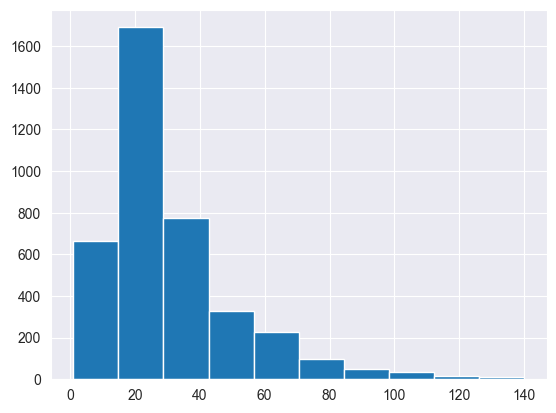

In [20]:
data["Tumor Size (mm)"].hist()
#plotting tumor size

/Users/oisinfrizzell/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


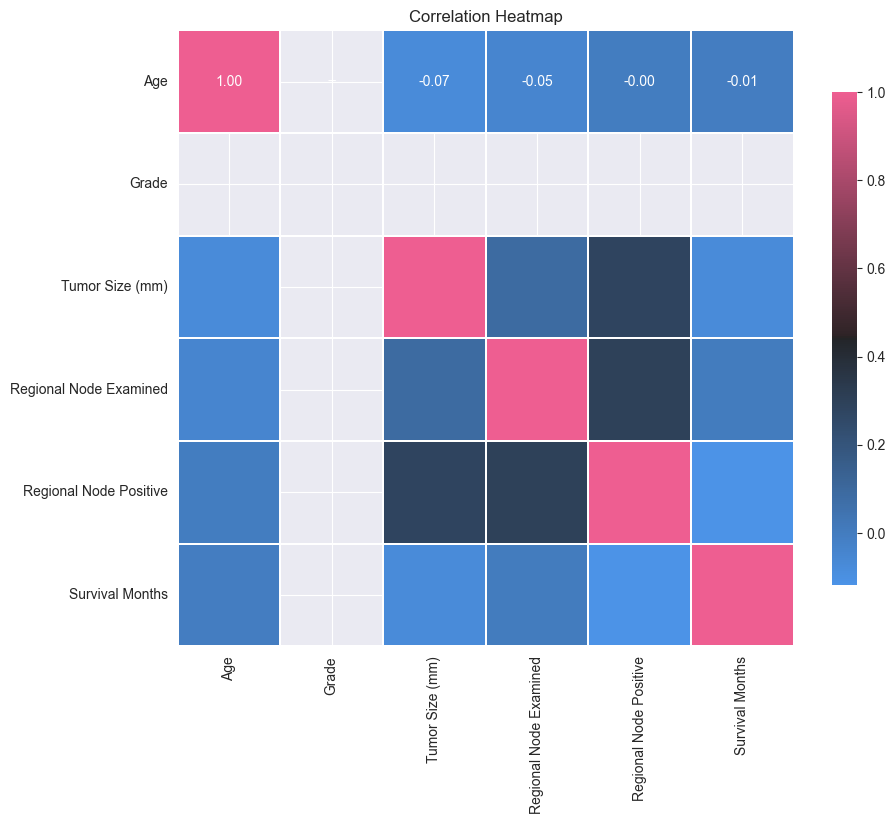

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#corelation graph to check correlation 
#naive bayes model works best with independent values
#might be problems cause there no numeric values here

# Assuming 'data' is your DataFrame, you might want to drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr(method='pearson')

# Define color palette
cmap = sns.diverging_palette(250, 354, s=80, l=60, center='dark', as_cmap=True)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            cmap=cmap,
            square=True,
            linewidths=.2,
            annot=True,  # Optionally display correlation values in the heatmap
            fmt=".2f",  # Format for displaying correlation values
            cbar_kws={"shrink": .8})  # Adjust color bar size
plt.title('Correlation Heatmap')
plt.show()


In [85]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [97]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/oisinfrizzell/Desktop/Repos/Block3Epic/cleaned_data.csv')

# Apply the transformation
df['Survived 36 months '] = df['Survival Months'].apply(lambda x: 1 if x > 36 else 0)

# Drop the original "Survival Months" column
df.drop('Survival Months', axis=1, inplace=True)

# Select features and target variable
X = df[['Age','Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive']]
y = df['Survived 36 months ']  # Use the new target variable "Survived 25 months"

# Print the updated DataFrame
df.head(100)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survived 70 months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,4,Positive,Positive,24,1,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,NaN,Regional,35,Positive,Positive,14,5,1
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,NaN,Regional,63,Positive,Positive,14,7,1
3,58,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,18,Positive,Positive,2,1,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,NaN,Regional,41,Positive,Positive,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,White,Single,T1,N1,IIA,Poorly differentiated,NaN,Regional,16,Positive,Positive,25,1,1
96,39,White,Married,T2,N1,IIB,Moderately differentiated,NaN,Regional,45,Positive,Positive,3,1,0
97,57,White,Married,T2,N1,IIB,Poorly differentiated,NaN,Regional,27,Positive,Positive,7,1,1
98,52,White,Single,T2,N1,IIB,Moderately differentiated,NaN,Regional,23,Positive,Positive,14,3,1


In [98]:
#setting up train test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [99]:
clf=GaussianNB()
clf.fit(X_train,y_train)

ValueError: could not convert string to float: 'T2'

In [95]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


#What it means 
#Precision measures the positive predictions made by the model
#high precision indicates that the model makes few false positive predictions
# Recall measures the proportion of true positive predictions among all actual positive instances in the dataset
# A high recall indicates that the model captures most of the positive instances
# The f1 score is the mean of precision and recall
#Accuracy measures the overall correctness of the model's predictions
#Macro average calculates the average of precision, recall, and F1-score across all classes
#Weighted average calculates the average of precision, recall, and F1-score, weighted by the number of instances of each class. 
# Support indicates the number of instances of each class in the dataset
#
#
#
#
#







              precision    recall  f1-score   support

           0       0.10      0.07      0.08        88
           1       0.93      0.95      0.94      1080

    accuracy                           0.89      1168
   macro avg       0.51      0.51      0.51      1168
weighted avg       0.86      0.89      0.87      1168

